In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/refs/heads/jimena/datasets/sample-flats-madrid-synthetic-coords.csv'
df = pd.read_csv(url)

In [27]:
df.columns

Index(['CODE', 'LOCATIONNAME', 'PRICE', 'AREA', 'ROOMNUMBER', 'BATHNUMBER',
       'STATUS', 'STUDIO', 'ISPENTHOUSE', 'DUPLEX', 'SWIMMINGPOOL', 'ELEVATOR',
       'X', 'Y'],
      dtype='object')

In [5]:
zip_path = './data/Barrios.zip'
gdf = gpd.read_file(f"zip://{zip_path}")

In [19]:
def comparar_listas(lista1, lista2):
    set1 = set(lista1)
    set2 = set(lista2)

    coincidencias = set1 & set2  # Elementos en ambas listas
    solo_en_lista1 = set1 - set2  # Elementos solo en lista1
    solo_en_lista2 = set2 - set1  # Elementos solo en lista2

    return {
        "coincidencias": sorted(coincidencias),
        "solo_en_lista1": sorted(solo_en_lista1),
        "solo_en_lista2": sorted(solo_en_lista2),
    }

In [17]:
# Guardo en un par de listas los valores únicos de los barrios para cada fuente.
barrios_shp = gdf.NOMBRE.unique().tolist()
barrios_url = df.LOCATIONNAME.unique().tolist()

In [25]:
# Diccionario de coincidencias de shp a url
coincidencias = {
    "Almenara": "Ventilla-Almenara",
    "Buenavista": "Buena Vista",
    "Castillejos": "Cuzco-Castillejos",
    "Corralejos": "Campo de las Naciones-Corralejos",
    "Cortes": "Huertas-Cortes",
    "El Cañaveral": "El Cañaveral - Los Berrocales",
    "El Salvador": "Salvador",
    "Embajadores": "Lavapiés-Embajadores",
    "Hispanoamérica": "Bernabéu-Hispanoamérica",
    "Justicia": "Chueca-Justicia",
    "La Concepción": "Concepción",
    "Los Jerónimos": "Jerónimos",
    "Orcasur": "12 de Octubre-Orcasur",
    "Palomeras Sureste": "Palomeras sureste",
    "Piovera": "Conde Orgaz-Piovera",
    "Ríos Rosas": "Nuevos Ministerios-Ríos Rosas",
    "Universidad": "Malasaña-Universidad",
    "Valdebernardo": "Valdebernardo - Valderribas",
    "Valdefuentes": "Valdebebas - Valdefuentes",
    "Valverde": "Tres Olivos - Valverde",
    "Ángeles": "Los Ángeles"
}


# Traducción de los elementos de shp usando el diccionario de coincidencias
lista_traducida = [coincidencias[item] if item in coincidencias else item for item in barrios_shp]




In [26]:
resultado = comparar_listas(lista_traducida, barrios_url)

print("Coincidencias:", resultado["coincidencias"])
print("Solo en lista shp:", resultado["solo_en_lista1"])
print("Solo en lista url:", resultado["solo_en_lista2"])

Coincidencias: ['12 de Octubre-Orcasur', 'Abrantes', 'Acacias', 'Adelfas', 'Aeropuerto', 'Alameda de Osuna', 'Almagro', 'Almendrales', 'Aluche', 'Amposta', 'Apóstol Santiago', 'Arapiles', 'Aravaca', 'Arcos', 'Argüelles', 'Atalaya', 'Bellas Vistas', 'Bernabéu-Hispanoamérica', 'Berruguete', 'Buena Vista', 'Butarque', 'Campamento', 'Campo de las Naciones-Corralejos', 'Canillas', 'Canillejas', 'Casa de Campo', 'Casco Histórico de Barajas', 'Casco Histórico de Vallecas', 'Casco Histórico de Vicálvaro', 'Castellana', 'Castilla', 'Chopera', 'Chueca-Justicia', 'Ciudad Jardín', 'Ciudad Universitaria', 'Colina', 'Comillas', 'Concepción', 'Conde Orgaz-Piovera', 'Costillares', 'Cuatro Caminos', 'Cuatro Vientos', 'Cuzco-Castillejos', 'Delicias', 'El Cañaveral - Los Berrocales', 'El Pardo', 'El Plantío', 'El Viso', 'Entrevías', 'Estrella', 'Fontarrón', 'Fuente del Berro', 'Fuentelarreina', 'Gaztambide', 'Goya', 'Guindalera', 'Hellín', 'Horcajo', 'Huertas-Cortes', 'Ibiza', 'Imperial', 'Jerónimos', 'L

In [37]:
# Calcular precio medio por barrio
precio_medio = df.groupby('LOCATIONNAME')['PRICE'].mean().reset_index()
precio_medio = precio_medio.rename(columns={'LOCATIONNAME': 'NOMBRE'})

# Unir con el GeoDataFrame de barrios
gdf = gdf.merge(precio_medio, on='NOMBRE', how='left')

In [41]:
# Rellenar barrios sin datos con 0 en la columna de precio
gdf['PRICE'] = gdf['PRICE'] .fillna(0)

In [42]:
centroide = gdf.geometry.centroid
lat_centro = centroide.y.mean()  # Promedio de las latitudes
lon_centro = centroide.x.mean()  # Promedio de las longitudes

In [46]:
lat_centro

4475023.242946045

In [ ]:
import folium
from folium import Choropleth

# Crear mapa centrado en la zona de interés
m = folium.Map(location=[lat_centro, lon_centro], zoom_start=1)

# Agregar coropletas (mapa de calor por barrios)
Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=['NOMBRE', 'PRICE'],
    key_on='feature.properties.NOMBRE',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Precio Medio de Vivienda',
).add_to(m)

# Mostrar mapa
m

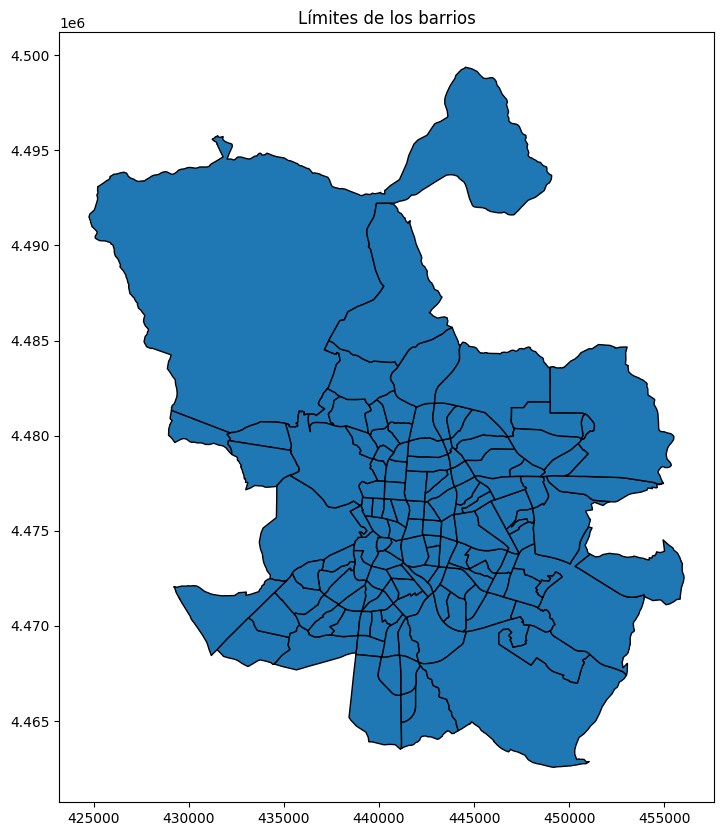

In [7]:
# Graficar los límites de los barrios
gdf.plot(edgecolor="black", figsize=(10, 10))
plt.title("Límites de los barrios")
plt.show()